# Import Modules

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [2]:
# Warnings are ignored in the following for better readability
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [3]:
redwine = pd.read_csv("winequality-red (1).csv", delimiter=';')

# Dataset Information 

In [92]:
redwine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Exploratory Data Analysis

# Quality Counter

In [4]:
print("Redwine: " + str(Counter(redwine['quality'])))

Redwine: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


<AxesSubplot:xlabel='quality', ylabel='count'>

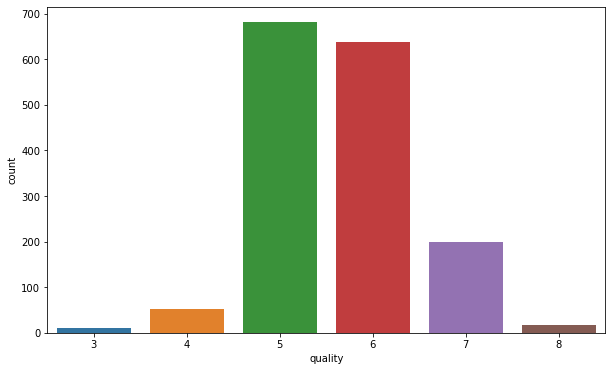

In [94]:
# Redwine
fig = plt.figure(figsize = (10,6))
x='quality'
sns.countplot(x = x, data=redwine)

## Distribution of the Dataset - Barplots of all Attributes

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

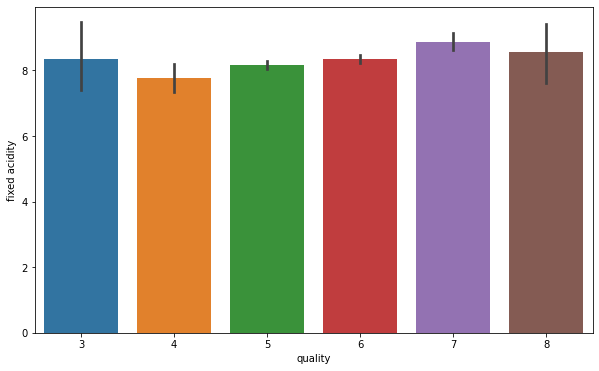

In [96]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'fixed acidity'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

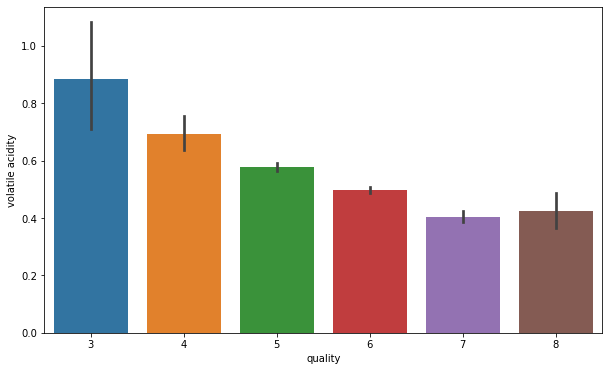

In [97]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'volatile acidity'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

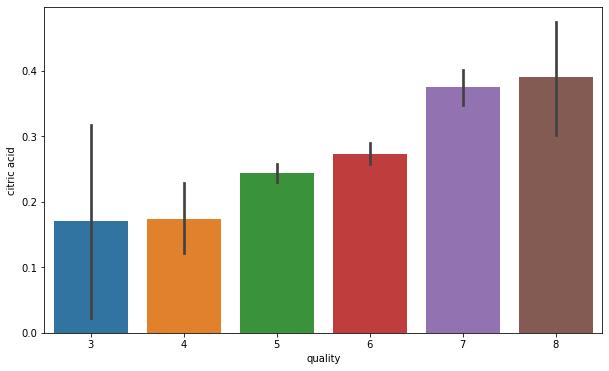

In [98]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'citric acid'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

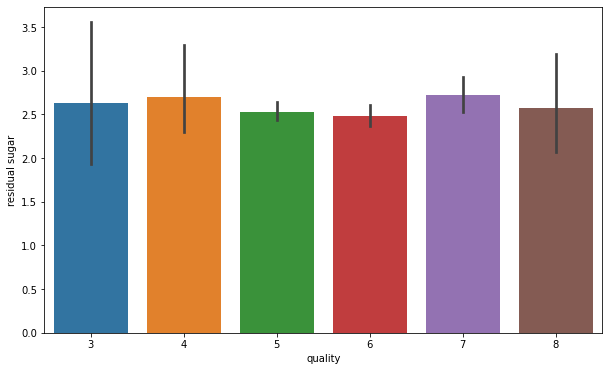

In [99]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'residual sugar'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

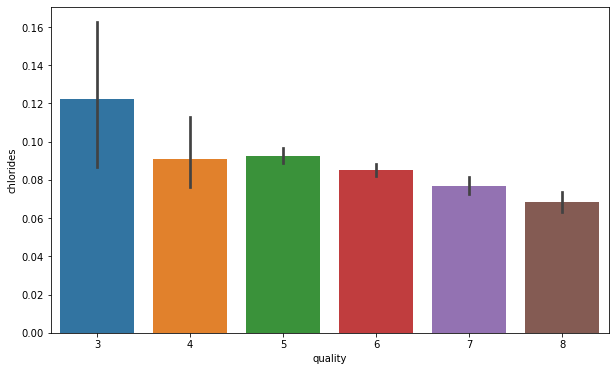

In [100]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'chlorides'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

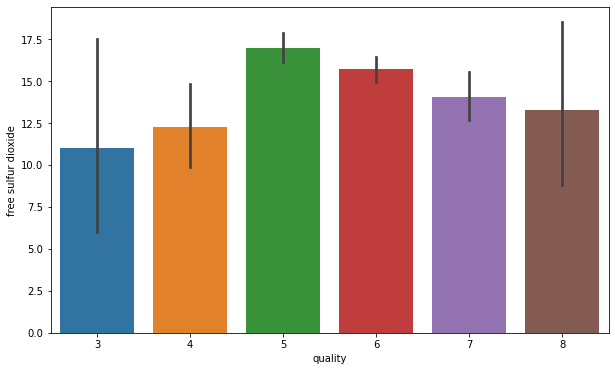

In [101]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'free sulfur dioxide'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

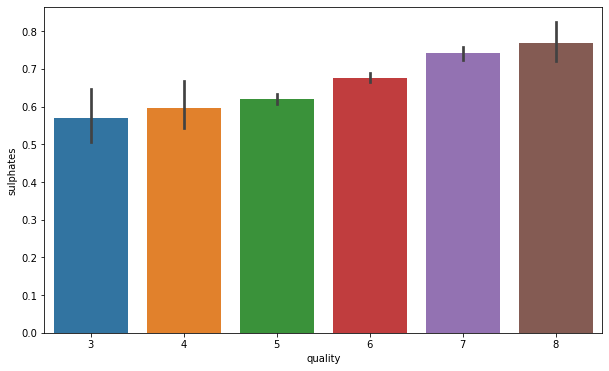

In [102]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'sulphates'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

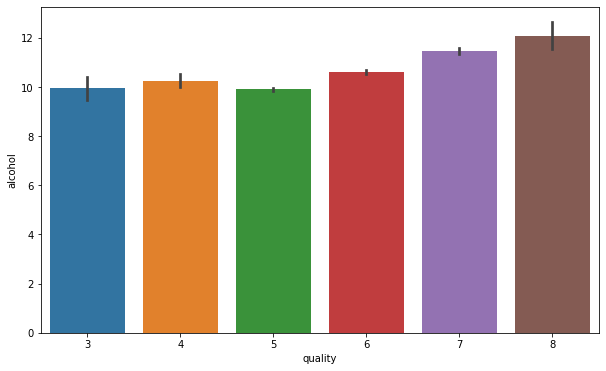

In [103]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'alcohol'
sns.barplot(x=x, y=y , data = redwine)

<AxesSubplot:xlabel='quality', ylabel='density'>

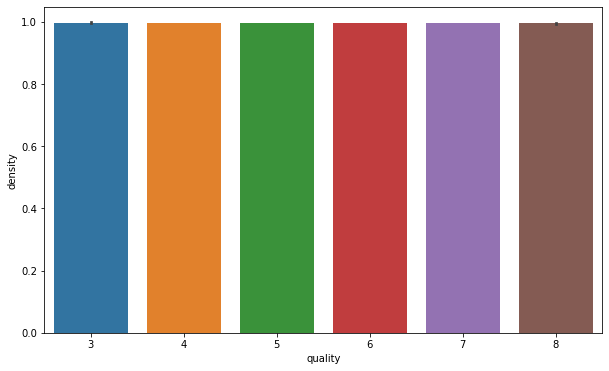

In [104]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'density'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

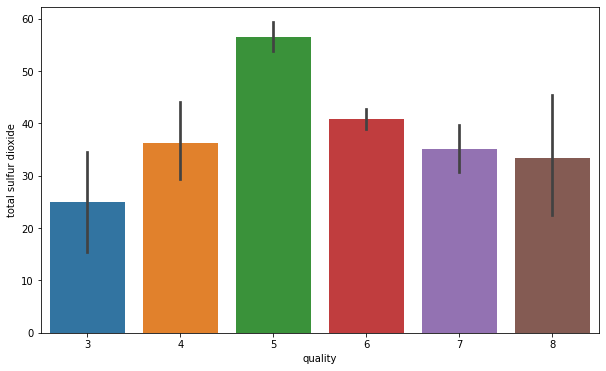

In [105]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'total sulfur dioxide'
sns.barplot(x = x, y = y, data = redwine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

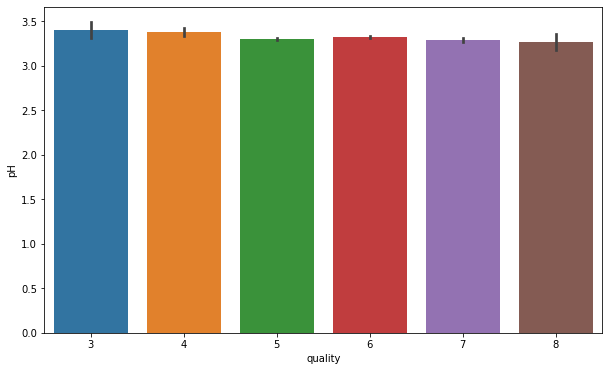

In [106]:
fig = plt.figure(figsize = (10,6))
x = 'quality'
y = 'pH'
sns.barplot(x = x, y = y, data = redwine)

# Correlation

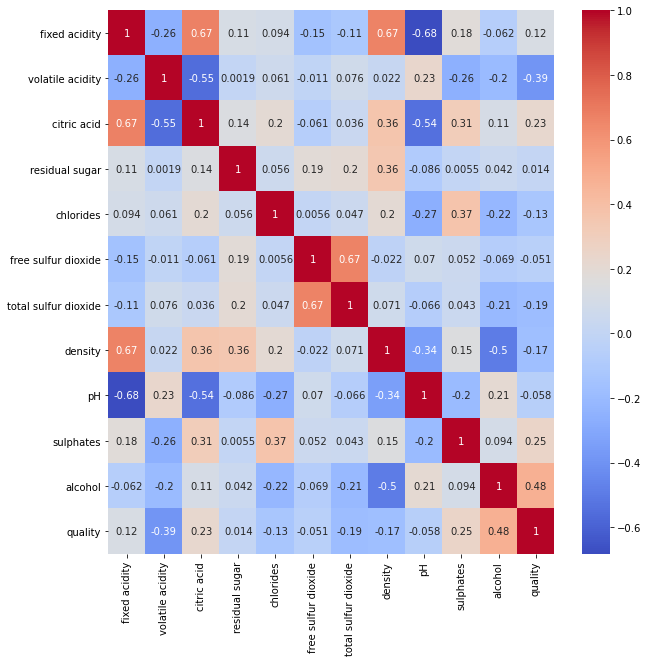

In [107]:
# For Redwine
plt.figure(figsize=(10, 10))
sns.heatmap(redwine.corr(), annot=True, cmap='coolwarm')
plt.show()

# Model Prediction with all classes

## Random Forest 

In [109]:
# define Attributes x and target attribute y
x = redwine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine['quality']

# Split Data into Training and Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# ML-Algorithm Random Forest (rf) and print out accuracy
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)

65.5


# Model Prediction with 3 classes

<AxesSubplot:xlabel='quality', ylabel='count'>

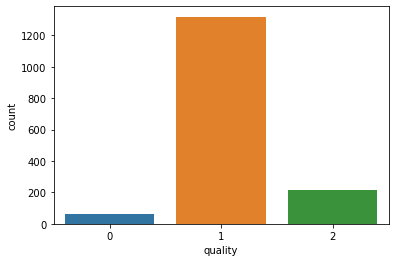

In [8]:
# Reduce the number of classes into three: Class 0: bad Quality; Class 1: Medium Quality; Class 2: Good Quality
redwine_3 = redwine.copy()
redwine_3['quality'] = redwine_3['quality'].apply(lambda x: 0 if x <= 4 else 1 if x <= 6 else 2)
sns.countplot(x='quality', data=redwine_3)

In [9]:
# Count the exact numbers of each class for further use of class weights
print("Redwine: " + str(Counter(redwine_3['quality'])))

Redwine: Counter({1: 1319, 2: 217, 0: 63})


# Train and Test Data

In [10]:
# Split Data into Train and Test Data for all the following ML-Models (with Reduced Attributes)
x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine_3['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Random Forest

In [181]:
class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217 
}

rf = RandomForestClassifier(class_weight=class_weights)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score * 100)

86.0


## Logistic Regression

In [182]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_acc_score * 100)

82.0


## Support Vector Classifier

In [183]:

svm_model = SVC()

svm_model.fit(x_train, y_train)
svm_predict = svm_model.predict(x_test)
svm_conf_matrix = confusion_matrix(y_test, svm_predict)
svm_acc_score = accuracy_score(y_test, svm_predict)
print(svm_acc_score*100)


82.5


## KNeighborsClassifier

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

knn_model = KNeighborsClassifier()

knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print(knn_acc_score*100)

82.0


 ## xgboost 


In [11]:
class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217 
}

xgb_model = xgb.XGBClassifier(class_weights=class_weights)

xgb_model.fit(x_train, y_train)
xgb_predict = xgb_model.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print(xgb_acc_score*100)

[12:41:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weights" } are not used.

85.25


## Naive Bayes

In [187]:
naive_bayes = GaussianNB()

naive_bayes.fit(x_train,y_train)
naive_bayes_predict = naive_bayes.predict(x_test)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predict)
naive_bayes_acc_score = accuracy_score(y_test, naive_bayes_predict)
print(naive_bayes_acc_score*100)


79.5


## Stochastic Gradient Descent


In [189]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)

sgd_predict = sgd.predict(x_test)
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score = accuracy_score(y_test, sgd_predict)
print(sgd_acc_score*100)


76.0


# Results (Model Prediction 3 Classes)

## Redwine

In [190]:
# Print Results of Accuracy of all Models into a table -> Random Forest is the best
results = pd.DataFrame({
    'Redwine-Model': ['Random Forest', 'Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Descent', "XGBoost"],
    'Score': [rf_acc_score * 100, lr_acc_score * 100, svm_acc_score * 100, knn_acc_score * 100, naive_bayes_acc_score * 100, sgd_acc_score * 100, xgb_acc_score*100]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')

result_df

,Redwine-Model
Score,
86.0,Random Forest
84.5,XGBoost
82.5,SVM
82.0,Logistic Regression
82.0,KNN
79.5,Naive Bayes
76.0,Gradient Descent


# Final Model: Random Forest

In [156]:
# Redwine - Final Model
from sklearn.metrics import f1_score

x = redwine_3[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
y = redwine_3['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=299)

class_weights = {
    0: 1 / 63,
    1: 1 / 1319,
    2: 1 / 217
}

red = RandomForestClassifier(class_weight=class_weights)
red.fit(x_train, y_train)
rf_predict = red.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict, average='weighted')
print(rf_f1_score * 100)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_acc_score*100)


86.32282913165267
88.75
